In [3]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.applications import VGG16
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [5]:
# Load dataset and split into train and validation sets
data_dir ='C:/Users/SANKET/Desktop/Mango_Leaves_Dataset'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 4000 images belonging to 8 classes.
Found 4000 images belonging to 8 classes.


In [7]:
# Define the base model using a pre-trained CNN
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

In [8]:
# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [9]:
# Add a few fully connected layers on top for classification
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
# Compile the model with a SGD optimizer and categorical cross-entropy loss
opt = SGD(lr=0.001, momentum=0.9)
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Set up early stopping and model checkpoint callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, verbose=1)

C:\Users\SANKET\anaconda3\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator), 
    callbacks=[early_stop, model_checkpoint]
)

C:\Users\SANKET\AppData\Local\Temp\ipykernel_5344\3219534045.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 2.0954 - accuracy: 0.1940
Epoch 1: val_loss improved from inf to 1.83853, saving model to best_model.h5
125/125 [==============================] - 2082s 17s/step - loss: 2.0954 - accuracy: 0.1940 - val_loss: 1.8385 - val_accuracy: 0.2998
Epoch 2/10
125/125 [==============================] - ETA: 0s - loss: 1.7696 - accuracy: 0.2822
Epoch 2: val_loss improved from 1.83853 to 1.59902, saving model to best_model.h5
125/125 [==============================] - 2083s 17s/step - loss: 1.7696 - accuracy: 0.2822 - val_loss: 1.5990 - val_accuracy: 0.4108
Epoch 3/10
125/125 [==============================] - ETA: 0s - loss: 1.6120 - accuracy: 0.3550
Epoch 3: val_loss improved from 1.59902 to 1.33399, saving model to best_model.h5
125/125 [==============================] - 2179s 17s/step - loss: 1.6120 - accuracy: 0.3550 - val_loss: 1.3340 - val_accuracy: 0.6215
Epoch 4/10
125/125 [==============================] - ETA: 0s - loss

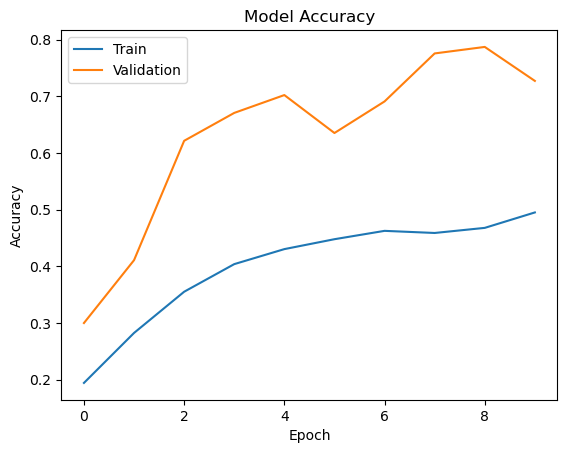

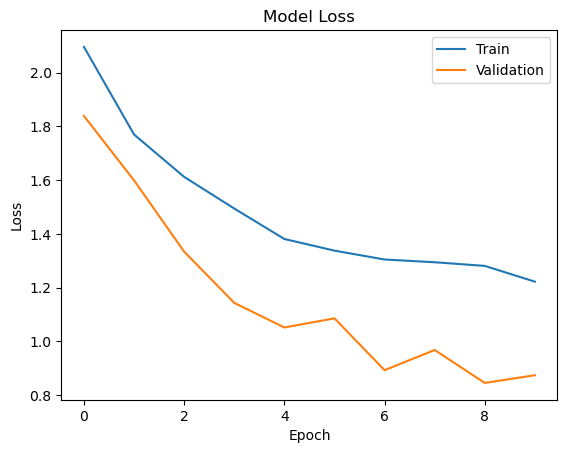

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()